# Muhammad Aman, Abdul Rafay Khatri

# Housing Price Prediction

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
df = pd.read_csv('./Data/Entities.csv')
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


# Data Exploration & Cleaning

In [3]:
df.dtypes

Unnamed: 0         int64
property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Total_Area       float64
dtype: object

In [4]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [5]:
df.describe(include = "object")

,page_url,property_type,location,city,province_name,purpose,date_added,agency,agent
count,168446,168446,168446,168446,168446,168446,168446,124375,124374
unique,168446,7,1509,5,3,2,124,5761,10598
top,https://www.zameen.com/Property/g_10_g_10_2_gr...,House,DHA Defence,Karachi,Punjab,For Sale,7/3/2019,Real Investment Consultants,Boez Ayub
freq,1,105468,22046,60484,70536,120655,9485,794,787


In [6]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-'*50)
    

Column Name:  page_url
['https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html'
 'https://www.zameen.com/Property/e_11_2_services_society_flat_available_for_sale-346905-3236-1.html'
 'https://www.zameen.com/Property/islamabad_g_15_house_is_available_for_sale-386513-764-1.html'
 ...
 'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_u_ground_1st_floor_house_is_available_for_sale-17355250-6757-1.html'
 'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_p_1st_floor_flat_is_available_for_sale-17355251-6752-1.html'
 'https://www.zameen.com/Property/bahria_town_karachi_bahria_town_precinct_31_good_location_luxurious_villa_for_sale_in_precicnt_31_of_bahria_town_karachi-17355287-10045-1.html']
--------------------------------------------------
Column Name:  property_type
['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room']
---------------------------------

In [7]:
df.isna().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [8]:
df =  df.drop(columns = ['Unnamed: 0','agency', 'agent'])
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,2178.008


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], format="%m/%d/%Y")
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,1089.004
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,15246.056
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,2178.008
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,10890.000
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,2178.008


<Axes: >

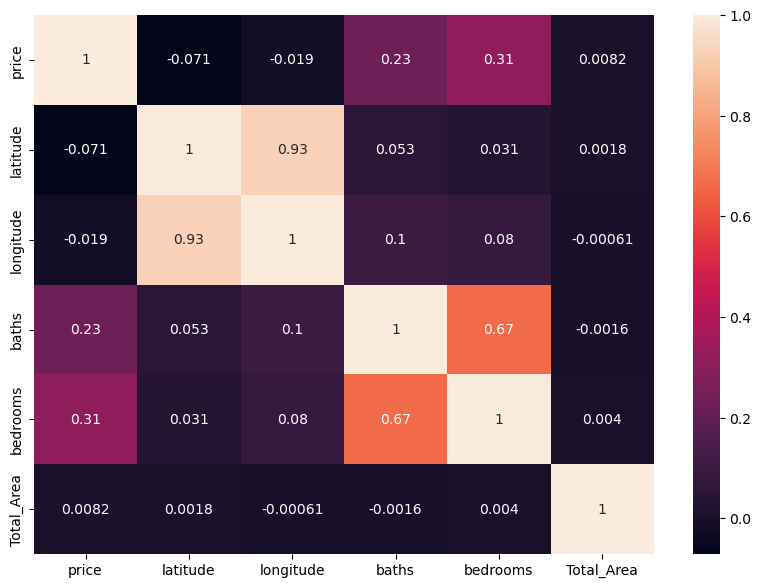

In [10]:
plt.figure(figsize = (10,7))
sns.heatmap(df[['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area']].corr(), annot=True)


<Axes: xlabel='bedrooms', ylabel='price'>

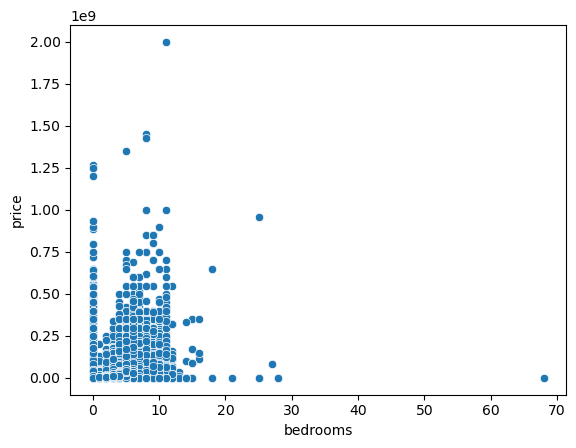

In [11]:
sns.scatterplot(data = df, x = 'bedrooms', y= 'price')

### Exploratory Data Analysis & Encoding

In [12]:
average_pricing_city = df.groupby('city').agg({'price':'mean'})
average_pricing_city

,price
city,
Faisalabad,7.827574e+06
Islamabad,1.339833e+07
Karachi,1.983883e+07
Lahore,2.528863e+07
Rawalpindi,8.576443e+06


<BarContainer object of 5 artists>

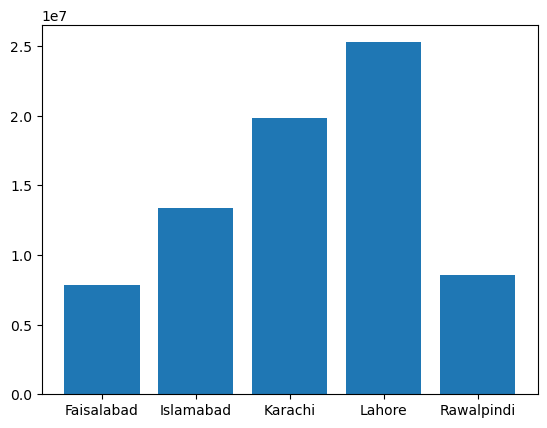

In [13]:
plt.bar(average_pricing_city.index,average_pricing_city['price'])

<Axes: xlabel='city', ylabel='price'>

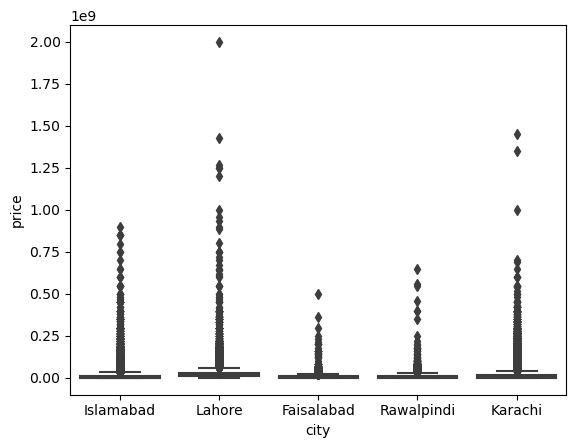

In [14]:
sns.boxplot(x= df['city'], y = df['price'])

In [15]:
average_pricing_property = df.groupby('property_type').agg({'price':'mean'})
average_pricing_property

,price
property_type,
Farm House,5.933984e+07
Flat,8.253729e+06
House,2.455157e+07
Lower Portion,1.345982e+06
Penthouse,1.683033e+07
Room,4.500444e+05
Upper Portion,2.119610e+06


<BarContainer object of 7 artists>

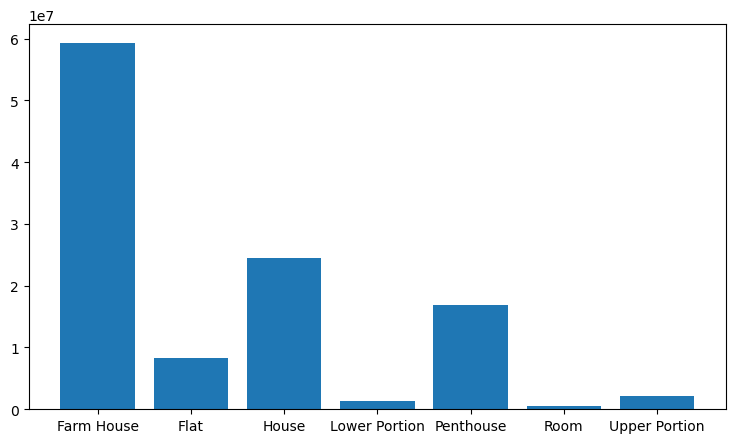

In [16]:
plt.figure(figsize = (9,5))
plt.bar(average_pricing_property.index,average_pricing_property['price'])

In [18]:
average_pricing_purpose = df.groupby('purpose').agg({'price':'mean'})
average_pricing_purpose

,price
purpose,
For Rent,9.488438e+04
For Sale,2.476513e+07


<BarContainer object of 2 artists>

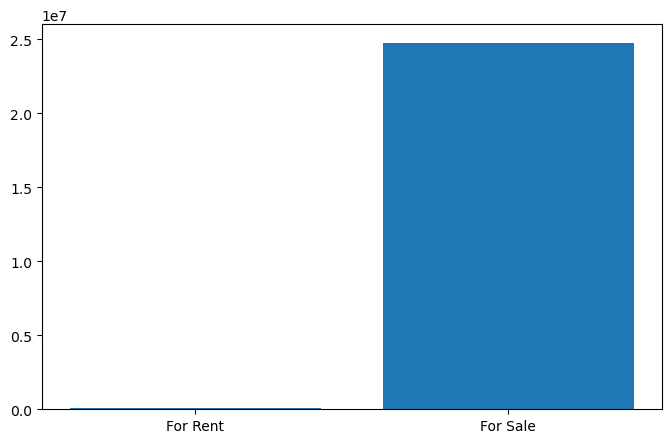

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(average_pricing_purpose.index, average_pricing_purpose['price'])

<Axes: xlabel='date_added', ylabel='price'>

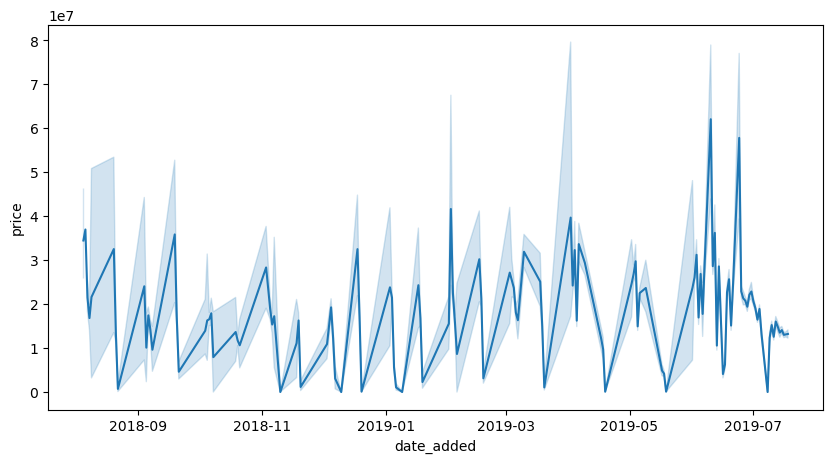

In [18]:
plt.figure(figsize = (10,5))
sns.lineplot(data =df, x = 'date_added', y = 'price')


In [20]:
dummies=pd.get_dummies(df[['city', 'purpose']], dtype=int)
dummies

,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1
4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
168441,0,0,1,0,0,0,1
168442,0,0,1,0,0,0,1
168443,0,0,1,0,0,0,1
168444,0,0,1,0,0,0,1


In [21]:
new_df = pd.concat([df,dummies], axis = 'columns')
new_df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,bedrooms,date_added,Total_Area,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,2,2019-02-04,1089.004,0,1,0,0,0,0,1
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,3,2019-05-04,15246.056,0,1,0,0,0,0,1
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,5,2019-07-17,2178.008,0,1,0,0,0,0,1
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,4,2019-04-05,10890.000,0,1,0,0,0,0,1
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,3,2019-07-10,2178.008,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,...,6,2019-07-18,26136.096,0,0,1,0,0,0,1
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,...,3,2019-07-18,2178.008,0,0,1,0,0,0,1
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,...,6,2019-07-18,26136.096,0,0,1,0,0,0,1
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,...,3,2019-07-18,21235.578,0,0,1,0,0,0,1


In [22]:
final_df = new_df.drop(columns = ['city','property_id','location_id','page_url','latitude','longitude','province_name','purpose','date_added'])
final_df

,property_type,price,location,baths,bedrooms,Total_Area,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,Flat,10000000,G-10,2,2,1089.004,0,1,0,0,0,0,1
1,Flat,6900000,E-11,3,3,15246.056,0,1,0,0,0,0,1
2,House,16500000,G-15,6,5,2178.008,0,1,0,0,0,0,1
3,House,43500000,Bani Gala,4,4,10890.000,0,1,0,0,0,0,1
4,House,7000000,DHA Defence,3,3,2178.008,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000,Gadap Town,0,6,26136.096,0,0,1,0,0,0,1
168442,House,12500000,Gadap Town,0,3,2178.008,0,0,1,0,0,0,1
168443,House,27000000,Gadap Town,0,6,26136.096,0,0,1,0,0,0,1
168444,House,11000000,Gadap Town,0,3,21235.578,0,0,1,0,0,0,1


In [23]:
frequency_map = final_df['location'].value_counts(normalize=True)
final_df['location'] = final_df['location'].map(frequency_map)
final_df.head()

,property_type,price,location,baths,bedrooms,Total_Area,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,Flat,10000000,0.003722,2,2,1089.004,0,1,0,0,0,0,1
1,Flat,6900000,0.016385,3,3,15246.056,0,1,0,0,0,0,1
2,House,16500000,0.007201,6,5,2178.008,0,1,0,0,0,0,1
3,House,43500000,0.007379,4,4,10890.000,0,1,0,0,0,0,1
4,House,7000000,0.130879,3,3,2178.008,0,1,0,0,0,0,1


In [37]:
frequency_map['DHA Defence']

0.13087873858684682

In [24]:
xcategory_mapping = {'Room': 0, 'Lower Portion': 1, 'Upper Portion': 2, 'Flat': 3, 'House': 4, 'Penthouse': 5, 'Farm House': 6}

final_df['property_type'] = final_df['property_type'].map(category_mapping)

# Modelling Data

In [25]:
X = final_df.drop(columns = ['price'])
X

,property_type,location,baths,bedrooms,Total_Area,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,3,0.003722,2,2,1089.004,0,1,0,0,0,0,1
1,3,0.016385,3,3,15246.056,0,1,0,0,0,0,1
2,4,0.007201,6,5,2178.008,0,1,0,0,0,0,1
3,4,0.007379,4,4,10890.000,0,1,0,0,0,0,1
4,4,0.130879,3,3,2178.008,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,4,0.018030,0,6,26136.096,0,0,1,0,0,0,1
168442,4,0.018030,0,3,2178.008,0,0,1,0,0,0,1
168443,4,0.018030,0,6,26136.096,0,0,1,0,0,0,1
168444,4,0.018030,0,3,21235.578,0,0,1,0,0,0,1


In [26]:
y = final_df['price']

In [27]:
X.shape, y.shape

((168446, 12), (168446,))

### Splitting Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((134756, 12), (134756,))

### Selecting Best Model

CV Score (Mean) Linear Regression: 0.20453668070711042
CV Score (Mean) Ridge Regression: 0.2045368026236721
CV Score (Mean) Lasso Regression: 0.20453668085116172
CV Score (Mean) Random Forest Regressor: 0.7559785271665307
CV Score (Mean) Decision Tree Regressor: 0.6166002555317314


{'whiskers': [<matplotlib.lines.Line2D at 0x17d12922d50>,
 'caps': [<matplotlib.lines.Line2D at 0x17d129b0650>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d1299c350>,
 'medians': [<matplotlib.lines.Line2D at 0x17d128c5e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x17d12a59c50>,
 'means': []}

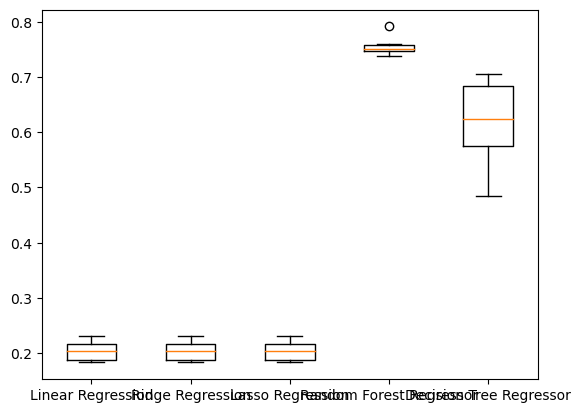

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha =0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}
results = []
for name, model in models.items():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    cv_results = cross_val_score(model,X_train,y_train, cv=kf, scoring = 'r2')
    print(f'CV Score (Mean) {name}: {np.mean(cv_results)}')
    results.append(cv_results)
plt.boxplot(results,labels=models.keys())

### Modelling

In [30]:
mod_rf = RandomForestRegressor()
mod_rf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = mod_rf.predict(X_test)

In [32]:

score = r2_score(y_test, y_pred)
print('R2 score: ', score)

R2 score:  0.8328353459395166


In [33]:
mod_rf.score(X_test, y_test)

0.8328353459395166

In [34]:
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  13919904.796212176


In [35]:
import pickle
with open("model_HousePrediction.pkl", "wb") as f:
    pickle.dump(mod_rf, f)